<h1>Question-1
    If the total population for youth (15 years and over) reaches 30,000 then what will be the employment rate? 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [67]:
df=pd.read_csv("Canada_Employment-1.csv")
df

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,Population 25 to 54 years.1,Employment rate 15 years and over,Employment rate 25 to 54 years
0,Total population,12-Feb,28077.5,14452.2,7.6,6.5,65.4,85.7,60.4,80.1
1,Total population,12-Mar,28101.9,14452.2,7.9,6.8,65.4,85.6,60.2,79.8
2,Total population,12-Apr,28129.4,14454.3,7.7,6.6,65.6,85.8,60.6,80.1
3,Total population,12-May,28158.3,14458.4,7.6,6.4,66.3,86.3,61.2,80.7
4,Total population,12-Jun,28189.2,14463.6,7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,Born in Canada,21-Oct,22093.1,9966.3,6.4,5.2,65.2,89.4,61.0,84.8
359,Born in Canada,21-Nov,22130.1,9983.0,5.7,4.4,64.6,89.4,60.9,85.5
360,Born in Canada,21-Dec,22195.1,10031.1,5.3,4.1,64.3,89.2,60.9,85.5
361,Born in Canada,22-Jan,22247.1,10068.4,5.6,4.3,63.9,88.9,60.3,85.2


In [8]:
df1=df.drop(columns={'Reference period','Population 25 to 54 years','Unemployment rate 15 years and over (%)','Unemployment rate 25 to 54 years (%)','Participation 15 years and over','Population 25 to 54 years.1','Employment rate 25 to 54 years'})
df1

,Immigrant status,Population 15 years and over,Employment rate 15 years and over
0,Total population,28077.5,60.4
1,Total population,28101.9,60.2
2,Total population,28129.4,60.6
3,Total population,28158.3,61.2
4,Total population,28189.2,62.1
...,...,...,...
358,Born in Canada,22093.1,61.0
359,Born in Canada,22130.1,60.9
360,Born in Canada,22195.1,60.9
361,Born in Canada,22247.1,60.3


In [9]:
employment_df = df1[df1['Immigrant status'] == 'Total population']
employment_df

,Immigrant status,Population 15 years and over,Employment rate 15 years and over
0,Total population,28077.5,60.4
1,Total population,28101.9,60.2
2,Total population,28129.4,60.6
3,Total population,28158.3,61.2
4,Total population,28189.2,62.1
...,...,...,...
116,Total population,31392.7,61.2
117,Total population,31429.3,61.3
118,Total population,31468.9,61.3
119,Total population,31507.9,60.8


In [10]:
youth_emp=employment_df.rename(columns={"Immigrant status": "immigration_status", "Population 15 years and over": "population_15_years_and_over","Employment rate 15 years and over":"employment_rate_15_years_and_over"})
youth_emp

,immigration_status,population_15_years_and_over,employment_rate_15_years_and_over
0,Total population,28077.5,60.4
1,Total population,28101.9,60.2
2,Total population,28129.4,60.6
3,Total population,28158.3,61.2
4,Total population,28189.2,62.1
...,...,...,...
116,Total population,31392.7,61.2
117,Total population,31429.3,61.3
118,Total population,31468.9,61.3
119,Total population,31507.9,60.8


In [11]:
X= youth_emp.iloc[:, 1].values.reshape(-1, 1)

In [12]:
Y= youth_emp.iloc[:, 2].values.reshape(-1, 1) 

In [13]:
from sklearn.model_selection import train_test_split  

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)  


In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(96, 1)
(25, 1)
(96, 1)
(25, 1)


In [15]:
linear_model=LinearRegression()

In [16]:
linear_model.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Youth Employment Rate')

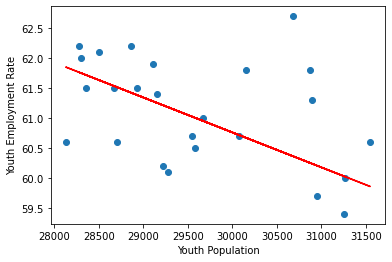

In [17]:
y_pred=linear_model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred,color='r')
plt.xlabel('Youth Population')
plt.ylabel('Youth Employment Rate')


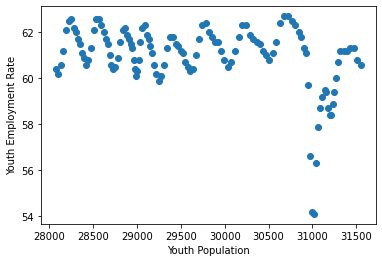

In [18]:
%matplotlib inline
plt.xlabel('Youth Population')
plt.ylabel('Youth Employment Rate')
plt.scatter(youth_emp.population_15_years_and_over,youth_emp.employment_rate_15_years_and_over)


In [19]:
reg=LinearRegression()
reg.fit(youth_emp[['population_15_years_and_over']],youth_emp.employment_rate_15_years_and_over)

LinearRegression()

In [20]:
reg.predict(np.array([35000]).reshape(-1, 1))

array([58.15783197])

In [21]:
reg.coef_

array([-0.00052874])

In [22]:
reg.intercept_

76.663774551331

In [23]:
-0.00052874*35000+76.66377455133102

58.15787455133102

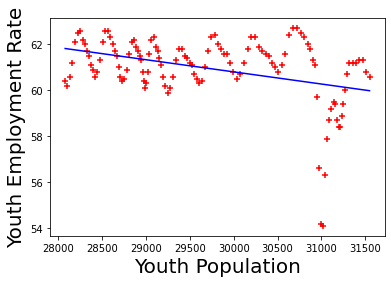

In [24]:
%matplotlib inline
plt.xlabel('Youth Population',fontsize=20)
plt.ylabel('Youth Employment Rate',fontsize=20)
plt.scatter(youth_emp.population_15_years_and_over,youth_emp.employment_rate_15_years_and_over,color='red',marker='+')
plt.plot(youth_emp.population_15_years_and_over,reg.predict(youth_emp[['population_15_years_and_over']]),color='blue')

<h2>ANS:-58.15787455133102

<H1>Question-2
    If the unemployment rate for 15 years and over is 8.0 and total overall population of canadians is 50000.0 then what will be the youth participation rate? 

In [25]:
M1=df.drop(columns={'Reference period','Population 25 to 54 years.1','Employment rate 25 to 54 years','Employment rate 15 years and over'})
M1

,Immigrant status,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over
0,Total population,28077.5,14452.2,7.6,6.5,65.4
1,Total population,28101.9,14452.2,7.9,6.8,65.4
2,Total population,28129.4,14454.3,7.7,6.6,65.6
3,Total population,28158.3,14458.4,7.6,6.4,66.3
4,Total population,28189.2,14463.6,7.3,6.0,66.9
...,...,...,...,...,...,...
358,Born in Canada,22093.1,9966.3,6.4,5.2,65.2
359,Born in Canada,22130.1,9983.0,5.7,4.4,64.6
360,Born in Canada,22195.1,10031.1,5.3,4.1,64.3
361,Born in Canada,22247.1,10068.4,5.6,4.3,63.9


In [26]:
unemployment_df = M1[M1['Immigrant status'] == 'Born in Canada']
unemployment_df

,Immigrant status,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over
242,Born in Canada,21120.3,10730.9,7.4,6.0,66.8
243,Born in Canada,21117.6,10703.7,7.6,6.3,66.7
244,Born in Canada,21129.1,10680.3,7.4,6.0,66.9
245,Born in Canada,21166.2,10675.4,7.3,5.8,67.5
246,Born in Canada,21195.9,10675.3,6.9,5.2,68.2
...,...,...,...,...,...,...
358,Born in Canada,22093.1,9966.3,6.4,5.2,65.2
359,Born in Canada,22130.1,9983.0,5.7,4.4,64.6
360,Born in Canada,22195.1,10031.1,5.3,4.1,64.3
361,Born in Canada,22247.1,10068.4,5.6,4.3,63.9


In [27]:
overall_unemp=unemployment_df.rename(columns={"Immigrant status": "immigration_status", "Population 15 years and over": "population_15_years_and_over","Population 25 to 54 years": "population_25_to_54_years","Unemployment rate 15 years and over (%)":"unemployment_rate_15_years_and_over(%)","Unemployment rate 25 to 54 years (%)":"unemployment_rate_25_to_54_years(%)","Participation 15 years and over":"participation_15_years_and_over"})
overall_unemp
                                

,immigration_status,population_15_years_and_over,population_25_to_54_years,unemployment_rate_15_years_and_over(%),unemployment_rate_25_to_54_years(%),participation_15_years_and_over
242,Born in Canada,21120.3,10730.9,7.4,6.0,66.8
243,Born in Canada,21117.6,10703.7,7.6,6.3,66.7
244,Born in Canada,21129.1,10680.3,7.4,6.0,66.9
245,Born in Canada,21166.2,10675.4,7.3,5.8,67.5
246,Born in Canada,21195.9,10675.3,6.9,5.2,68.2
...,...,...,...,...,...,...
358,Born in Canada,22093.1,9966.3,6.4,5.2,65.2
359,Born in Canada,22130.1,9983.0,5.7,4.4,64.6
360,Born in Canada,22195.1,10031.1,5.3,4.1,64.3
361,Born in Canada,22247.1,10068.4,5.6,4.3,63.9


In [28]:
overall_unemp['total_population'] = overall_unemp['population_15_years_and_over'] + overall_unemp['population_15_years_and_over']

In [29]:
overall_unemp

,immigration_status,population_15_years_and_over,population_25_to_54_years,unemployment_rate_15_years_and_over(%),unemployment_rate_25_to_54_years(%),participation_15_years_and_over,total_population
242,Born in Canada,21120.3,10730.9,7.4,6.0,66.8,42240.6
243,Born in Canada,21117.6,10703.7,7.6,6.3,66.7,42235.2
244,Born in Canada,21129.1,10680.3,7.4,6.0,66.9,42258.2
245,Born in Canada,21166.2,10675.4,7.3,5.8,67.5,42332.4
246,Born in Canada,21195.9,10675.3,6.9,5.2,68.2,42391.8
...,...,...,...,...,...,...,...
358,Born in Canada,22093.1,9966.3,6.4,5.2,65.2,44186.2
359,Born in Canada,22130.1,9983.0,5.7,4.4,64.6,44260.2
360,Born in Canada,22195.1,10031.1,5.3,4.1,64.3,44390.2
361,Born in Canada,22247.1,10068.4,5.6,4.3,63.9,44494.2


In [30]:
reg=LinearRegression()
reg.fit(overall_unemp[['unemployment_rate_15_years_and_over(%)','unemployment_rate_25_to_54_years(%)','total_population']],overall_unemp.participation_15_years_and_over)

LinearRegression()

In [31]:
reg.coef_

array([ 1.29641475e+00, -1.96682908e+00, -1.55855356e-03])

In [32]:
reg.intercept_


135.74673628398955

In [33]:
reg.predict([[8.0,9.0,50000.0]])

array([50.48891477])

In [34]:
 1.29641475e+00*8.0+-1.96682908e+00*9.0+-1.55855356e-03*50000.0+135.74673628398924

50.48891456398924

In [35]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Total Population')

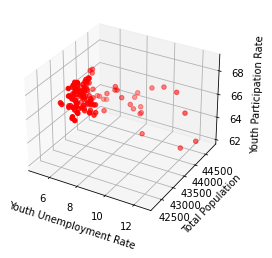

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x1=overall_unemp["unemployment_rate_15_years_and_over(%)"]
# x2=overall_unemp["unemployment_rate_25_to_54_years(%)"]
x3=overall_unemp["total_population"]
x4=overall_unemp["participation_15_years_and_over"]


ax.scatter(x1,x3,x4,c="r",marker="o")
ax.set_xlabel("Youth Unemployment Rate")
ax.set_zlabel("Youth Participation Rate")
ax.set_ylabel("Total Population")




<h2>50.48891456398924

<h1>Question-3
    Based on the employment and unemployment rate what will be the immigration status?

In [68]:
df11=pd.read_csv('Canada_Employment.csv')
df11

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,Total population,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,Total population,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,Total population,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,Total population,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,Total population,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,Born in Canada,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,Born in Canada,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,Born in Canada,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,Born in Canada,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [53]:
df11 = df11.rename(columns={'Reference period': 'Time Period'})
df11

,Immigrant status,Time Period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,Total population,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,Total population,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,Total population,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,Total population,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,Total population,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,Born in Canada,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,Born in Canada,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,Born in Canada,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,Born in Canada,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [54]:
df11.isnull().sum()

Immigrant status                           0
Time Period                                0
Population 15 years and over               0
Population 25 to 54 years                  0
Unemployment rate 15 years and over (%)    0
Unemployment rate 25 to 54 years (%)       0
Participation 15 years and over            0
25 to 54 years                             0
Employment rate 15 years and over          0
Employment rate 25 to 54 years             0
dtype: int64

In [55]:
g = df11.groupby("Immigrant status")

In [56]:
df12 = g.get_group('Landed immigrants')

In [57]:
df12.head()

,Immigrant status,Time Period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
121,Landed immigrants,Feb-12,"6,406.40","3,365.60",8.6,8.1,61.0,81.9,55.8,75.3
122,Landed immigrants,Mar-12,"6,420.70","3,384.10",8.7,8.3,61.2,81.9,55.8,75.1
123,Landed immigrants,Apr-12,"6,431.10","3,405.80",8.5,8.3,61.7,82.3,56.4,75.5
124,Landed immigrants,May-12,"6,427.60","3,415.80",8.6,8.4,62.4,82.8,57.0,75.8
125,Landed immigrants,Jun-12,"6,427.60","3,420.70",8.5,8.2,62.9,83.3,57.6,76.4


In [58]:
df13 = g.get_group('Born in Canada')
df13

,Immigrant status,Time Period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
242,Born in Canada,Feb-12,"21,120.30","10,730.90",7.4,6.0,66.8,87.1,61.9,81.8
243,Born in Canada,Mar-12,"21,117.60","10,703.70",7.6,6.3,66.7,87.1,61.6,81.6
244,Born in Canada,Apr-12,"21,129.10","10,680.30",7.4,6.0,66.9,87.2,61.9,82.0
245,Born in Canada,May-12,"21,166.20","10,675.40",7.3,5.8,67.5,87.7,62.6,82.7
246,Born in Canada,Jun-12,"21,195.90","10,675.30",6.9,5.2,68.2,88.1,63.5,83.5
...,...,...,...,...,...,...,...,...,...,...
358,Born in Canada,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,Born in Canada,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,Born in Canada,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,Born in Canada,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

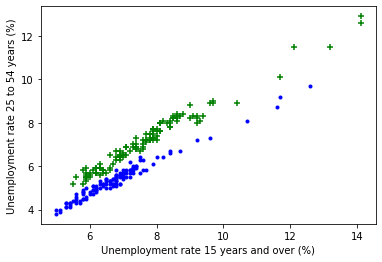

In [59]:
plt.xlabel('Unemployment rate 15 years and over (%)')
plt.ylabel('Unemployment rate 25 to 54 years (%)')
plt.scatter(df12['Unemployment rate 15 years and over (%)'], df12['Unemployment rate 25 to 54 years (%)'],color="green",marker='+')
plt.scatter(df13['Unemployment rate 15 years and over (%)'], df13['Unemployment rate 25 to 54 years (%)'],color="blue",marker='.')

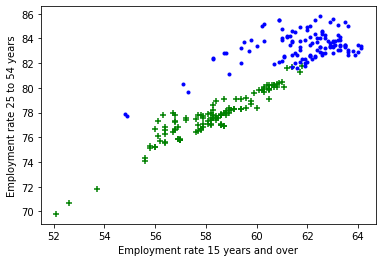

In [60]:
plt.xlabel('Employment rate 15 years and over')
plt.ylabel('Employment rate 25 to 54 years')
plt.scatter(df12['Employment rate 15 years and over'], df12['Employment rate 25 to 54 years'],color="green",marker='+')
plt.scatter(df13['Employment rate 15 years and over'], df13['Employment rate 25 to 54 years'],color="blue",marker='.')

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
dfle = df11
dfle['Immigrant status'] = le.fit_transform(dfle['Immigrant status'])
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [71]:
from sklearn.model_selection import train_test_split

In [89]:
X = dfle.drop(['Reference period','Immigrant status', 'Population 15 years and over', 'Population 25 to 54 years', 'Participation 15 years and over', '25 to 54 years'], axis='columns')
y = dfle['Immigrant status']

In [90]:
X.head()

,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Employment rate 15 years and over,Employment rate 25 to 54 years
0,7.6,6.5,60.4,80.1
1,7.9,6.8,60.2,79.8
2,7.7,6.6,60.6,80.1
3,7.6,6.4,61.2,80.7
4,7.3,6.0,62.1,81.5


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
len(X_train)

290

In [93]:
len(X_test)

73

In [94]:
from sklearn.svm import SVC
model = SVC()

In [95]:
model.fit(X_train, y_train)

SVC()

In [96]:
model.score(X_test, y_test)

0.5205479452054794

In [97]:
model_C = SVC(C=30)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9452054794520548

In [98]:
model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9315068493150684

In [99]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [100]:
model_linear_kernal.score(X_test, y_test)

0.9452054794520548

In [101]:
model_linear_kernal.predict([[8.3,9.3,62.4,85.5]]) 

array([0])

<h1>Question-4
     Based on the Employment rate 25 to 54 years what will be immigration status?

In [103]:
dfle = df11
dfle['Immigrant status'] = le.fit_transform(dfle['Immigrant status'])
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [104]:
dfle.drop(df.index[df['Immigrant status'] == 2], inplace=True)
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


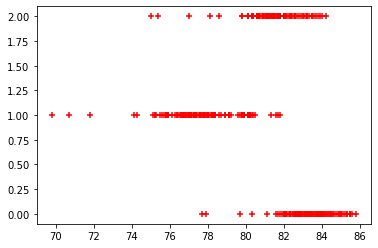

In [105]:
plt.scatter(dfle['Employment rate 25 to 54 years'],dfle['Immigrant status'],marker='+',color='red')

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dfle['Employment rate 25 to 54 years'],dfle['Immigrant status'],train_size=0.8)

In [108]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [110]:
model.fit(X_train, y_train)

C:\Users\dharm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [111]:
y_predicted = model.predict(X_test)

In [112]:
y_predicted

array([2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 1], dtype=int64)

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[22,  0,  4],
       [ 0, 17,  5],
       [ 7,  0, 18]], dtype=int64)

Text(69.0, 0.5, 'Truth')

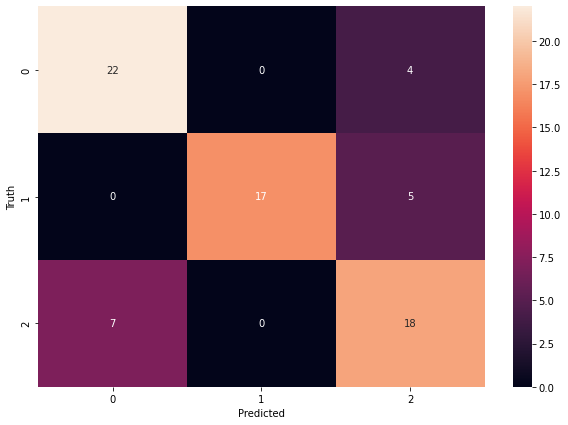

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<H1>Question-5
    What will be Unemployment rate among Landed immigrants if the Adult Population (25 to 54 years) is 8000?

In [116]:
dfle = df11
dfle['Immigrant status'] = le.fit_transform(dfle['Immigrant status'])
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [117]:
dfle.drop(df.index[df['Immigrant status'] == 2], inplace=True)
dfle.drop(df.index[df['Immigrant status'] == 0], inplace=True)
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50","14,452.20",7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90","14,452.20",7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40","14,454.30",7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30","14,458.40",7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20","14,463.60",7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10","9,966.30",6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10","9,983.00",5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10","10,031.10",5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10","10,068.40",5.6,4.3,63.9,88.9,60.3,85.2


In [118]:
 dfle["Population 25 to 54 years"] = [float(str(i).replace(",", "")) for i in df["Population 25 to 54 years"]]
dfle

,Immigrant status,Reference period,Population 15 years and over,Population 25 to 54 years,Unemployment rate 15 years and over (%),Unemployment rate 25 to 54 years (%),Participation 15 years and over,25 to 54 years,Employment rate 15 years and over,Employment rate 25 to 54 years
0,2,Feb-12,"28,077.50",14452.2,7.6,6.5,65.4,85.7,60.4,80.1
1,2,Mar-12,"28,101.90",14452.2,7.9,6.8,65.4,85.6,60.2,79.8
2,2,Apr-12,"28,129.40",14454.3,7.7,6.6,65.6,85.8,60.6,80.1
3,2,May-12,"28,158.30",14458.4,7.6,6.4,66.3,86.3,61.2,80.7
4,2,Jun-12,"28,189.20",14463.6,7.3,6.0,66.9,86.7,62.1,81.5
...,...,...,...,...,...,...,...,...,...,...
358,0,Oct-21,"22,093.10",9966.3,6.4,5.2,65.2,89.4,61.0,84.8
359,0,Nov-21,"22,130.10",9983.0,5.7,4.4,64.6,89.4,60.9,85.5
360,0,Dec-21,"22,195.10",10031.1,5.3,4.1,64.3,89.2,60.9,85.5
361,0,Jan-22,"22,247.10",10068.4,5.6,4.3,63.9,88.9,60.3,85.2


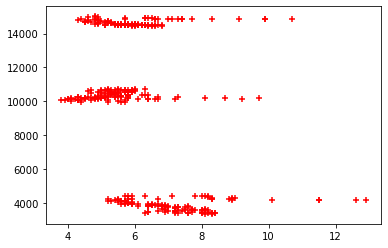

In [119]:
plt.scatter(dfle['Unemployment rate 25 to 54 years (%)'],dfle['Population 25 to 54 years'],marker='+',color='red')

In [120]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(dfle['Population 25 to 54 years'], dfle['Unemployment rate 25 to 54 years (%)'],train_size=0.8)

In [123]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)

LinearRegression()

In [127]:
X_test

array([[14888.4],
       [ 3922.8],
       [10569.4],
       [14716.5],
       [ 3586.3],
       [ 3841.6],
       [14552.1],
       [10699.3],
       [10520.4],
       [ 4055.9],
       [10677.5],
       [10101.5],
       [10125.1],
       [14477.4],
       [10525. ],
       [14647.9],
       [10078. ],
       [14530.6],
       [14520.1],
       [14512.5],
       [14541.5],
       [14469. ],
       [14506. ],
       [14530.1],
       [14528.5],
       [10407.8],
       [ 3569.7],
       [14819.5],
       [ 4101.9],
       [ 3544.6],
       [10625.3],
       [14478.9],
       [10068.4],
       [14959.6],
       [ 3587.9],
       [14452.2],
       [10355.7],
       [ 3903.7],
       [14564.4],
       [ 3742.4],
       [ 3408.4],
       [10550.3],
       [10275.6],
       [14576.7],
       [ 3682.9],
       [10730.9],
       [14875.2],
       [ 3405.8],
       [10310.9],
       [10197.5],
       [14508.1],
       [14669.7],
       [14847.2],
       [10633.3],
       [ 3884.8],
       [14

In [128]:
y_predicted = model.predict(X_test)

In [129]:
y_predicted

array([[5.48745291],
       [6.92050837],
       [6.05188773],
       [5.50991791],
       [6.96448436],
       [6.93112011],
       [5.53140277],
       [6.03491156],
       [6.05829137],
       [6.903114  ],
       [6.03776053],
       [6.11303593],
       [6.10995173],
       [5.54116505],
       [6.05769021],
       [5.518883  ],
       [6.11610706],
       [5.53421253],
       [5.53558473],
       [5.53657795],
       [5.53278804],
       [5.54226281],
       [5.53742741],
       [5.53427787],
       [5.53448697],
       [6.07300667],
       [6.96665376],
       [5.49645721],
       [6.89710242],
       [6.96993399],
       [6.04458236],
       [5.54096902],
       [6.11736165],
       [5.47814803],
       [6.96427526],
       [5.54445834],
       [6.07981543],
       [6.92300448],
       [5.52979532],
       [6.9440842 ],
       [6.98773348],
       [6.05438385],
       [6.09028342],
       [5.52818788],
       [6.95186005],
       [6.03078187],
       [5.48917797],
       [6.988

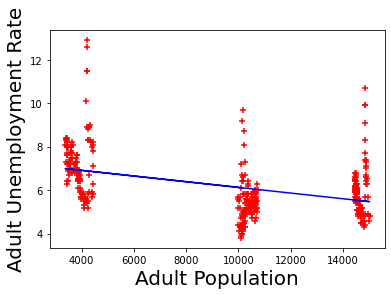

In [130]:
%matplotlib inline
plt.xlabel('Adult Population',fontsize=20)
plt.ylabel('Adult Unemployment Rate',fontsize=20)
plt.scatter(dfle['Population 25 to 54 years'],dfle['Unemployment rate 25 to 54 years (%)'],color='red',marker='+')
plt.plot(dfle['Population 25 to 54 years'],model.predict(dfle[['Population 25 to 54 years']]),color='blue')

In [132]:
model.predict([[8000]])

array([[6.38767353]])

<h2>Unemployment rate will be 6.38%